<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [4]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [5]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-5-975bf9c6861f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [6]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [7]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Text(0.5, 1.0, 'boxplot of Median value of owner-occupied homes')

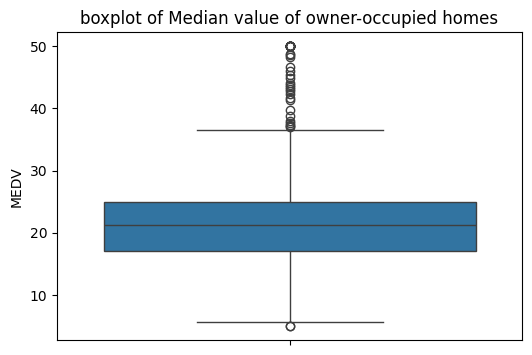

In [7]:
# For the "Median value of owner-occupied homes" provide a boxplot
plt.figure(figsize=(6,4))
sns.boxplot(data= boston_df, y='MEDV')
#plt.xlabel('')
plt.ylabel('MEDV')
plt.title('boxplot of Median value of owner-occupied homes')

In [ ]:
# The boxplot illustrates the distribution of the "Median value of owner-occupied homes." The typical range for this variable lies between approximately 2 and 47. Additionally, there are outliers present, indicating data points that fall significantly beyond the interquartile range (IQR). 

Text(0.5, 1.0, 'bar plot of the Charles river variable')

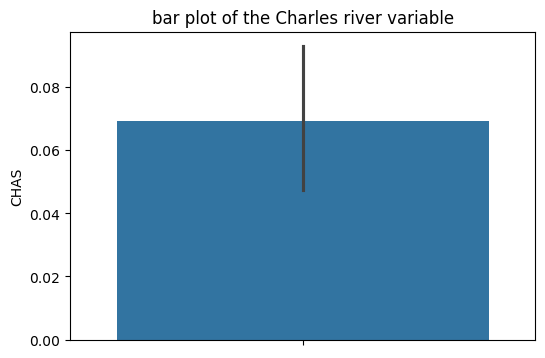

In [9]:
# Provide a  bar plot for the Charles river variable
plt.figure(figsize=(6,4))
sns.barplot(data= boston_df, y='CHAS')
plt.ylabel('CHAS')
plt.title('bar plot of the Charles river variable')

In [ ]:
#

Text(0.5, 1.0, 'boxplot for the MEDV variable vs the AGE')

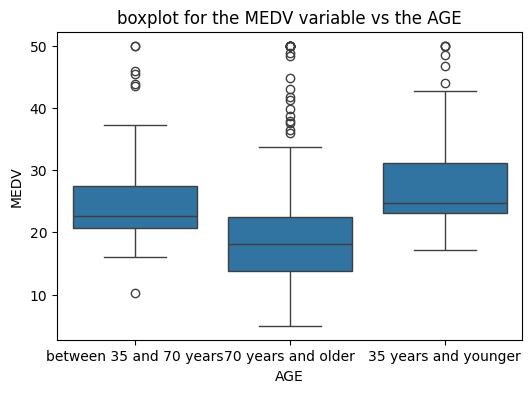

In [10]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)
boston_df.loc[(boston_df['AGE']<=35),'age_group']='35 years and younger'
boston_df.loc[(boston_df['AGE']>35) & (boston_df['AGE']<70),'age_group']='between 35 and 70 years'
boston_df.loc[(boston_df['AGE']>=70),'age_group']='70 years and older'
plt.figure(figsize=(6,4))
sns.boxplot(data=boston_df, x='age_group', y='MEDV')
plt.xlabel('AGE')
plt.ylabel('MEDV')
plt.title('boxplot for the MEDV variable vs the AGE')

In [ ]:
#

Text(0.5, 1.0, 'scatter plot')

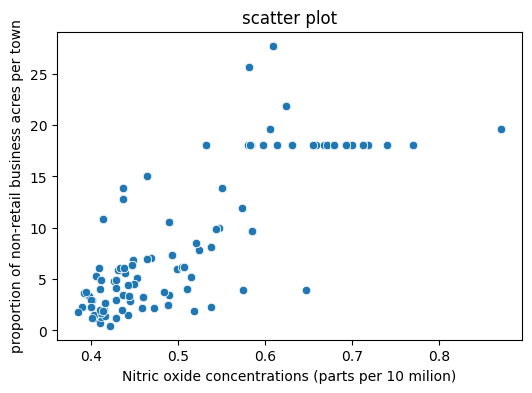

In [11]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?
plt.figure(figsize=(6,4))
sns.scatterplot(data=boston_df, x='NOX', y='INDUS')
plt.xlabel('Nitric oxide concentrations (parts per 10 milion)')
plt.ylabel('proportion of non-retail business acres per town')
plt.title('scatter plot')

In [ ]:
# The figure suggests a linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town, up to a Nitric oxide concentration level of 0.6. Beyond this level, the proportion of non-retail business acres per town remains unchanged, even as Nitric oxide concentrations increase further.

Text(0.5, 1.0, 'Histogram of the pupil to teacher ratio variable')

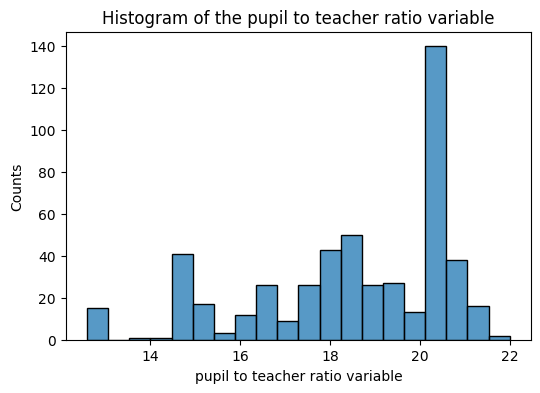

In [12]:
#Create a histogram for the pupil to teacher ratio variable
plt.figure(figsize=(6,4))
sns.histplot(data=boston_df, x='PTRATIO',bins=20)
plt.xlabel('pupil to teacher ratio variable')
plt.ylabel('Counts')
plt.title('Histogram of the pupil to teacher ratio variable')

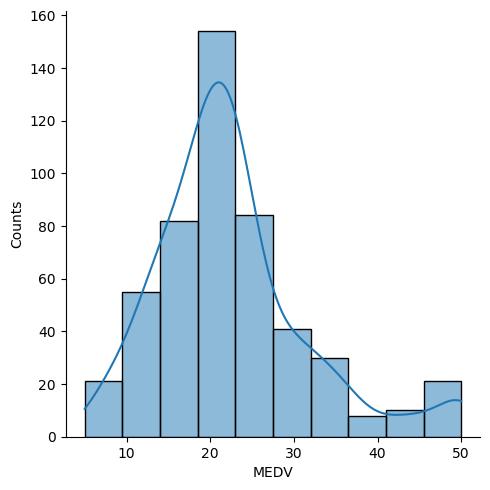

In [13]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
ax=sns.displot(boston_df['MEDV'],bins=10, kde=True)
ax.set(xlabel='MEDV',ylabel='Counts')


In [14]:
# Based on the plot, since the dependent variable follows a normal distribution, a T-test is appropriate.
#Levene's test to assess whether variances are equal
#Null hypothesis:HO: we have equal variancies for both groups
#Alternative hypothesis HA: the variances are not equal 
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'],center='mean')

#According the p value result and assuming that the significance level is set 0.05, then since the pvalue<0.05 we can reject the null hypothesis and say the variances rae not equal.

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [15]:
# T test
#Null hypothesis:HO: there is no significant difference between means of the two groups mentioned before (the means are equal)
#Alternative hypothesis HA: there is a significant difference between means of the two groups
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)

#According to the p-value, since it is less than the significance level, we reject the null hypothesis and conclude there is a significant difference between the means of the two groups. 

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

In [16]:
# Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
#Since AGE is a continuous variable, we need to create a new column in our dataset that categorizes AGE into smaller, defined groups as follows:

boston_df['AGE'].describe()

count    506.000000
mean      68.574901
std       28.148861
min        2.900000
25%       45.025000
50%       77.500000
75%       94.075000
max      100.000000
Name: AGE, dtype: float64

In [17]:
#Define new column with defined ranges:
boston_df.loc[boston_df['AGE']<=25,'age_range']='25 years and younger'
boston_df.loc[(boston_df['AGE']>25)& (boston_df['AGE']<=50),'age_range']='between 25 and 50 years including 50' 
boston_df.loc[(boston_df['AGE']>50)& (boston_df['AGE']<75),'age_range']='between 50 and 75 years'
boston_df.loc[boston_df['AGE']>=75, 'age_range']='75 years and older'


In [18]:
# For the ANOVA test, certain assumptions must be met. We've already verified that the continuous variable follows a normal distribution. Next, we will examine whether the variances across groups are equal.

#Levene's test to assess whether variances are equal
#Null hypothesis:HO: we have equal variancies for all groups
#Alternative hypothesis HA: the variances are not equal 

scipy.stats.levene(boston_df[boston_df['age_range']=='25 years and younger']['MEDV'], boston_df[boston_df['age_range']=='between 25 and 50 years including 50']['MEDV'], 
                   boston_df[boston_df['age_range']=='between 50 and 75 years']['MEDV'], boston_df[boston_df['age_range']=='75 years and older']['MEDV'],
                  center='mean')


#Since the p-value is greater than the significance level, we fail to reject the null hypothesis, 
#indicating that the variances are equal and there is no significant difference between them.


LeveneResult(statistic=1.2034976425222839, pvalue=0.30787840561835633)

In [22]:
f_statistic, p_value = scipy.stats.f_oneway(boston_df[boston_df['age_range']=='25 years and younger']['MEDV'],boston_df[boston_df['age_range']=='between 25 and 50 years including 50']['MEDV'],
                                            boston_df[boston_df['age_range']=='between 50 and 75 years']['MEDV'], boston_df[boston_df['age_range']=='75 years and older']['MEDV'])

print("f_statistic: {0}, p-value: {1}".format(f_statistic,p_value))

# Since the P value is smaller then 0.05, then we reject the null hypothesis, this means that at least one of the means differ.

f_statistic: 25.4866772097812, p-value: 2.3178855286954125e-15


[Text(0.5, 0, 'Nitric oxide concentrations (parts per 10 milion)'),
 Text(0, 0.5, 'proportion of non-retail business acres per town'),
 Text(0.5, 1.0, 'Scatter plot')]

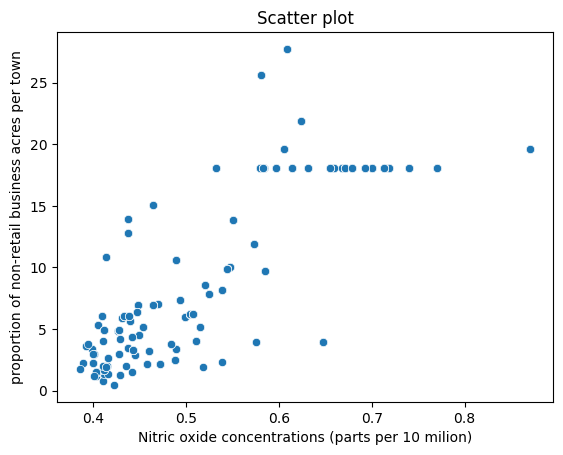

In [23]:
# Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

# H0=null hypothesis= Nitric oxide concentrations are not correlated with the proportion of non-retail business acres per town
# HA= Alternative hypothesis= Nitric oxide concentrations are correlated with the proportion of non-retail business acres per town

ax= sns.scatterplot(x='NOX', y='INDUS', data=boston_df)
ax.set(xlabel='Nitric oxide concentrations (parts per 10 milion)', ylabel='proportion of non-retail business acres per town', title='Scatter plot')

In [19]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

# Since the P value is less than the significant level, we can reject the null hypothesis, this means nitric oxide 
# concentrations are correlated with the proportion of non-retail business acres per town

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

In [20]:
# What is the impact of an additional weighted distance  to the five Boston employment 
# centres on the median value of owner occupied homes? (Regression analysis)

# We will use Regression in place of Correlation 
# H0=Null hypothesis= there is no correlation between the impact of an additional weighted distance  to the five Boston employment 
# centers and the median value of owner-occupied homes
# HA= Alternative hypothesis= There is a correlation between these two.

# X is the input variable
X=boston_df['DIS']
# y is dependent variable
y=boston_df['MEDV']

model=sm.OLS(y,X).fit()
predictions=model.predict(X)

model.summary()

# Since the P value is less than 0.05, then we can reject the null hypothesis and say there is a correlation between these two variables. 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.732
Model:                            OLS   Adj. R-squared (uncentered):              0.732
Method:                 Least Squares   F-statistic:                              1380.
Date:                Thu, 31 Oct 2024   Prob (F-statistic):                   1.52e-146
Time:                        15:14:58   Log-Likelihood:                         -1999.8
No. Observations:                 506   AIC:                                      4002.
Df Residuals:                     505   BIC:                                      4006.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
DIS            4.7985      0.129     37.149      0.000       4.545       5.052
==============================================================================
Omnibus:                       40.135   Durbin-Watson:                   0.343
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.968
Skew:                           0.431   Prob(JB):                     1.76e-20
Kurtosis:                       4.889   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""